# OPEN-CV Tutorial using Jupyter Notebook

🎥 **Welcome to Our OpenCV Tutorial Class!** 👋

Hey everyone! Today, we’re diving into the fascinating world of **OpenCV (Open Source Computer Vision Library)** — a powerful open-source tool that helps computers “see” and understand images and videos just like we do.

In this session, we’ll explore a variety of key concepts and practical tools you’ll be using when working with OpenCV. Here's a quick look at what we’ll cover:

### 🔍 **What is OpenCV?**
- A brief overview of OpenCV and why it's the go-to library for image and video processing.
- Real-world applications — from facial recognition to self-driving cars!

### 🧠 **What We'll Learn Today**
We’ll break the session into a few hands-on modules:

1. **Getting Started:**
   - Installing OpenCV
   - Loading images and videos
   - Basic display and window functions

2. **Image Processing Basics:**
   - Grayscale conversion
   - Blurring and filtering
   - Edge detection (Canny)

3. **Drawing and Shapes:**
   - Adding lines, circles, rectangles, and text to images

4. **Video Handling:**
   - Capturing video from webcam
   - Processing each frame in real-time

5. **Face Detection (Mini Project):**
   - Using Haar cascades to detect faces in an image or video

### 🚀 **What You’ll Walk Away With**
By the end of today’s class, you’ll be able to:
- Understand how to work with images and video streams using OpenCV.
- Build basic real-time image-processing applications.
- Get comfortable using the OpenCV library for future projects.

---


## Creating a Virtual Environment

**Copy-Paste this command to your system**

In [ ]:
python3 -m venv venv

## Linux or MacOs Systems

**Copy-Paste this command to your system**

In [ ]:
source venv/bin/activate


## Windows Systems

**Copy-Paste this command to your system**

In [ ]:
venv\Scripts\activate


### Installing the requirments for the session

**Copy-Paste this command to your system**

In [ ]:
pip install -r requirments.txt

### Upgrading your pip for further installations

**Copy-Paste this command to your system**

In [ ]:
pip install --upgrade pip

---

### ✅ **Let’s Get Started!**

Alright, team — it’s time to roll up our sleeves and bring images to life with code! 💪📸

You're not just going to **learn OpenCV today**, you're going to **see the world the way machines do** — through pixels, patterns, and powerful processing.

Remember:

🚀 **You don’t need to be a computer vision expert to start — you just need curiosity.**  
🧠 **Every error is a step closer to mastery.**  
💡 **You’re learning a skill that powers facial recognition, self-driving cars, augmented reality, and more.**

So open up your code editor, fire up your webcam, and let’s take our **first step into the world of computer vision**.  
This is where things get visual, exciting, and just a little bit magical. ✨

---

Ready? Let’s code! 🔧👀💻

---

## OpenCv Reading the Image

**Using cv.imread**

Matplotlib is building the font cache; this may take a moment.


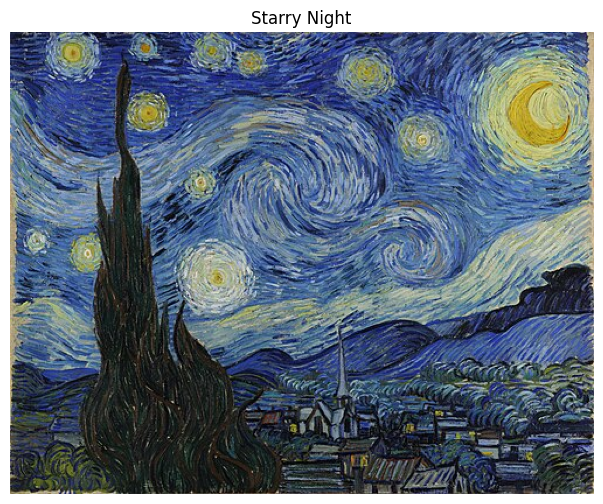

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img = cv.imread(cv.samples.findFile("starrynight.jpg"))

# Check if the image was loaded properly
if img is None:
    raise ValueError("Could not read the image.")

# Convert from BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the image inline using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Starry Night")
plt.axis("off")
plt.show()


**Saving the image**

In [ ]:
cv.imwrite("starry_night.png", img)

## OpenCV capturing frames from WebCam

**Capturing the 3 frames from webcam and saving the video**

**After capturing for 10 seconds, you can see the video**

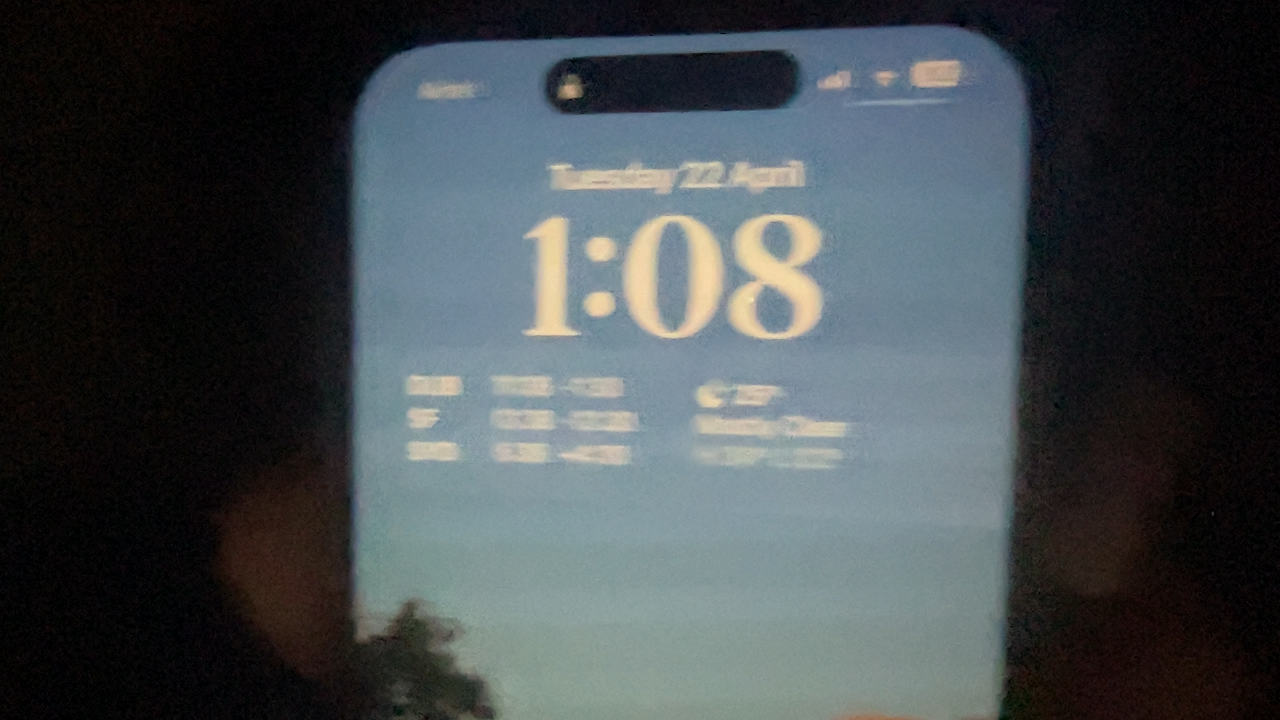

In [15]:
import cv2 as cv
import time
import random
from IPython.display import display, clear_output
from PIL import Image

# Initialize webcam
cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

saved_frames = []
start_time = time.time()

# Generate 3 random capture timestamps within the next 10 seconds
capture_times = sorted(random.sample(range(1, 9), 3))  # Avoid very early/late captures

current_capture = 0

while time.time() - start_time < 10:
    ret, frame = cap.read()
    if not ret:
        break

    # Current elapsed time
    elapsed = int(time.time() - start_time)

    # Save frame if the elapsed time matches the capture times
    if current_capture < 3 and elapsed == capture_times[current_capture]:
        saved_frames.append(frame.copy())
        current_capture += 1

    # Display the current frame
    rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    img = Image.fromarray(rgb_frame)

    clear_output(wait=True)
    display(img)

# Release everything
cap.release()
cv.destroyAllWindows()


## Colour variations in CV2

**Applying all colour transfromations using open-cv library**

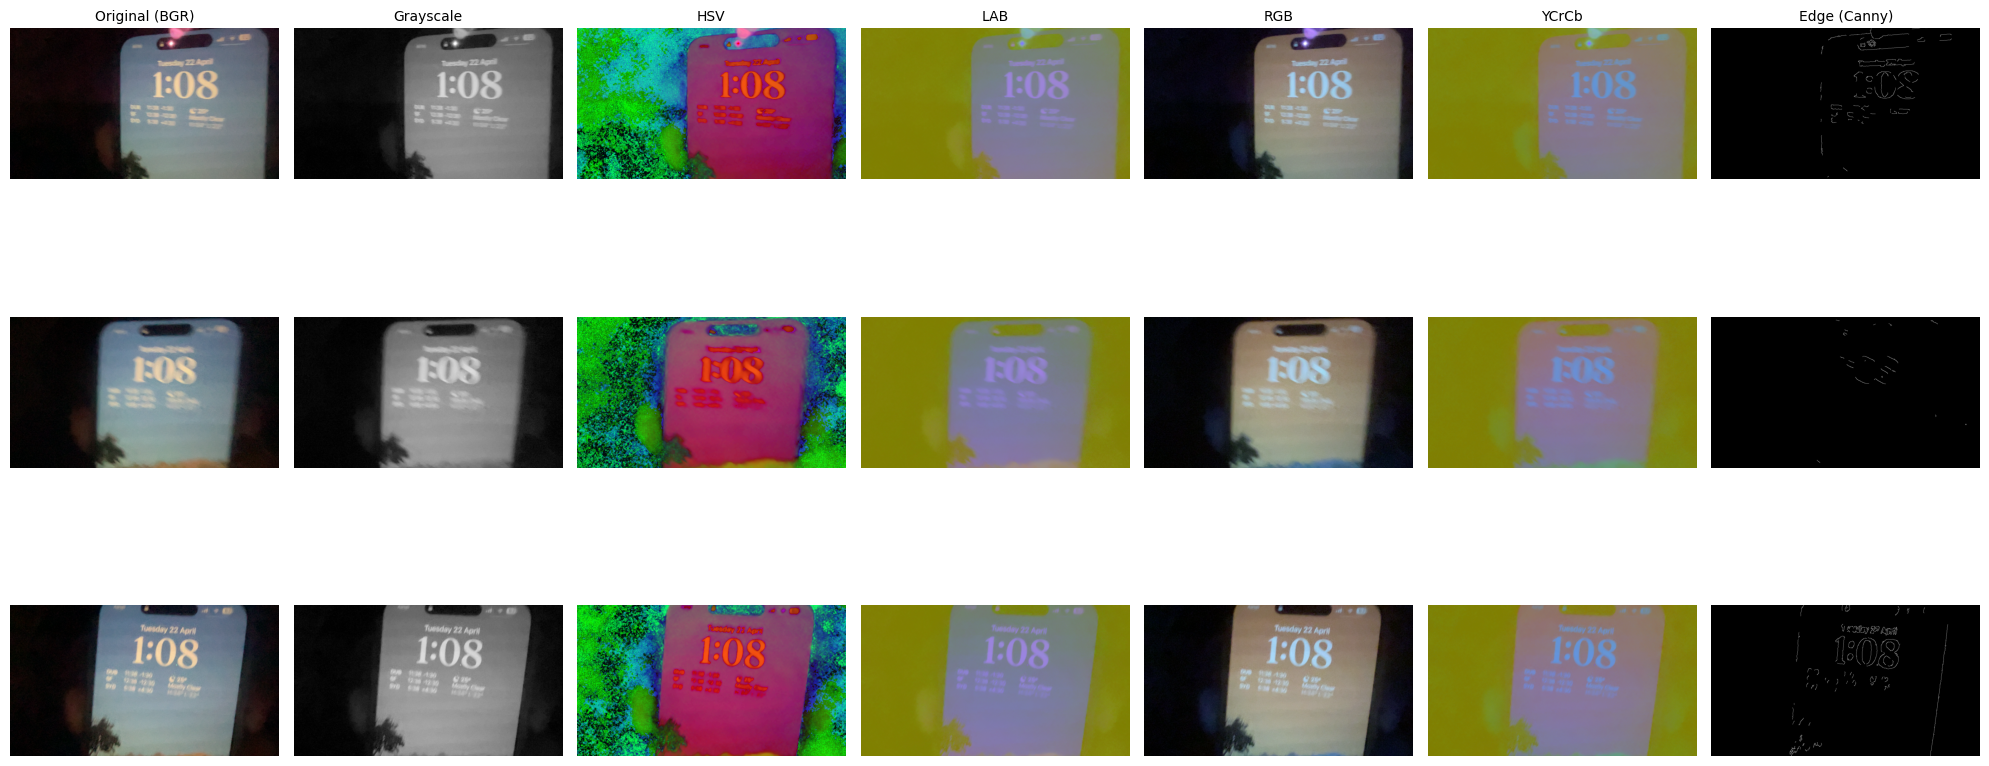

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define color transformations
color_spaces = {
    "Original (BGR)": lambda img: img,
    "Grayscale": lambda img: cv.cvtColor(img, cv.COLOR_BGR2GRAY),
    "HSV": lambda img: cv.cvtColor(img, cv.COLOR_BGR2HSV),
    "LAB": lambda img: cv.cvtColor(img, cv.COLOR_BGR2Lab),
    "RGB": lambda img: cv.cvtColor(img, cv.COLOR_BGR2RGB),
    "YCrCb": lambda img: cv.cvtColor(img, cv.COLOR_BGR2YCrCb),
    "Edge (Canny)": lambda img: cv.Canny(img, 100, 200),
}

# Create the plot
fig, axes = plt.subplots(len(saved_frames), len(color_spaces), figsize=(20, 10))

for row_idx, frame in enumerate(saved_frames):
    for col_idx, (name, transform) in enumerate(color_spaces.items()):
        transformed = transform(frame)
        # Convert grayscale or edge image to 3-channel for consistency
        if len(transformed.shape) == 2:
            transformed = cv.cvtColor(transformed, cv.COLOR_GRAY2RGB)
        else:
            transformed = cv.cvtColor(transformed, cv.COLOR_BGR2RGB)

        axes[row_idx, col_idx].imshow(transformed)
        if row_idx == 0:
            axes[row_idx, col_idx].set_title(name, fontsize=10)
        axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()


## Open-CV Drawing Options

**Drawing in Open CV**

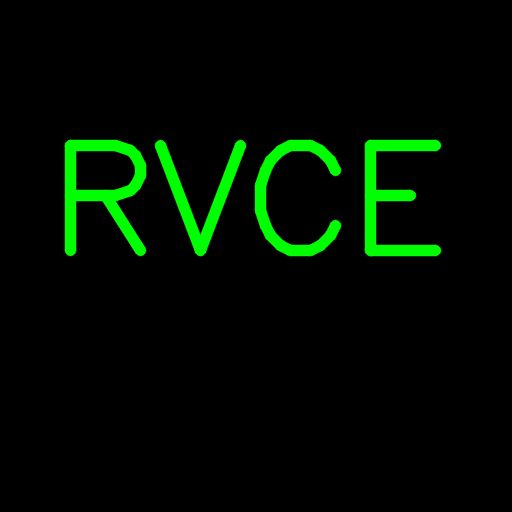

In [17]:
import numpy as np
import cv2 as cv

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw the letters 'RVCE' using putText
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'RVCE', (50, 250), font, 5, (0, 255, 0), 10, cv.LINE_AA)

# Display the image in Jupyter
from PIL import Image
from IPython.display import display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))


---

### 🧠 **Introduction to Face Detection**

Face detection is a computer vision technology that identifies and locates human faces in images or video streams. It's a foundational part of many AI and security applications — from unlocking your phone with your face to tagging friends in photos on social media.

At its core, face detection doesn’t recognize *who* the person is — it just determines **where** a face is in the frame. This makes it a crucial **first step** before performing tasks like:
- Face recognition
- Emotion detection
- Eye tracking
- Anti-spoofing detection

OpenCV provides robust tools (like **Haar Cascades** and **DNN models**) to detect faces with just a few lines of code.

---

### 🎉 **Now to the Fun Part!**

Let’s roll up our sleeves and start coding some **real-time face detection**!  
We’ll use OpenCV’s built-in pre-trained Haar cascade classifier to detect faces from your webcam.

Get ready to see some magic 🪄 as your computer finds faces in real time — right from your live camera feed!

**Converting image to RGB**

In [30]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**Function to Display and Count Faces**

In [25]:
import cv2
import matplotlib.pyplot as plt

def count_and_display(name):
    # Load cascade classifier training file for Haar cascade
    haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

    # Load test image
    test1 = cv2.imread(f'{name}.jpg')

    # Check if image is loaded
    if test1 is None:
        raise ValueError("Image not found or path is incorrect")

    # Convert the test image to grayscale (as OpenCV expects gray images for face detection)
    gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image using matplotlib
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')  # optional, to hide axis ticks
    plt.show()

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

    #print the number of faces found
    print('Faces found: ', len(faces))

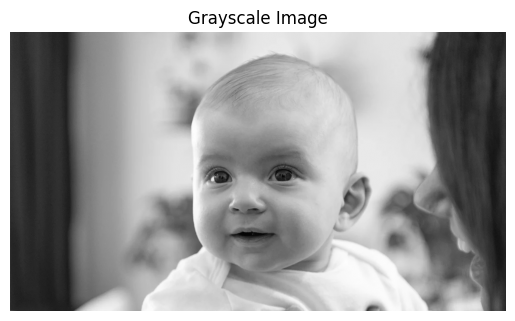

Faces found:  1


In [26]:
count_and_display("baby")


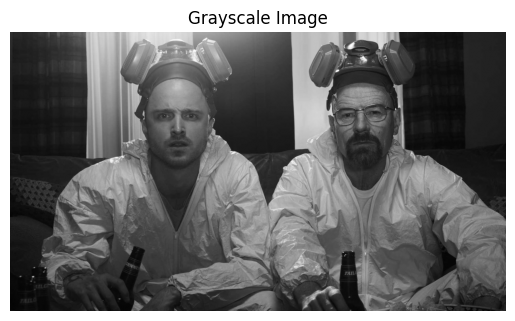

Faces found:  2


In [27]:
count_and_display("say_my_name")


## Bounded Boxes

**Adding bounding-boxes across faces being detected**

In [62]:
def bounded_boxes_haar(name):
    # Load Haar cascade classifier
    haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

    # Load the image
    test1 = cv2.imread(f'{name}.jpg')

    if test1 is None:
        raise ValueError("Image not found or path is incorrect")

    # Convert to grayscale
    gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    # Print number of faces found
    print('Faces found:', len(faces))

    # Draw rectangles around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(test1, (x, y), (x + w, y + h), (0, 255, 0), 6)

    # Convert BGR image to RGB for display
    rgb_img = convertToRGB(test1)

    # Display the image with detected faces
    plt.imshow(rgb_img)
    plt.title('Detected Faces')
    plt.axis('off')
    plt.show()

**Testing the new function**

Faces found: 1


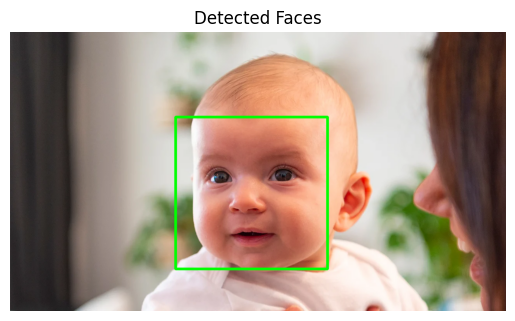

Faces found: 2


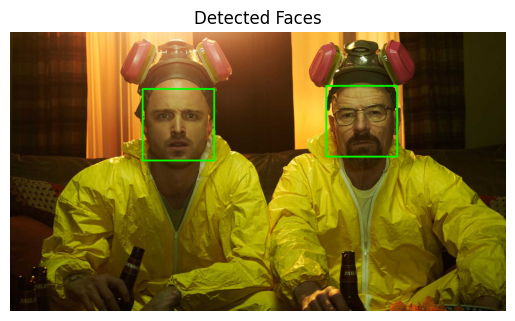

In [63]:
bounded_boxes_haar("baby")
bounded_boxes_haar("say_my_name")

**Testing the limits**

Faces found: 5


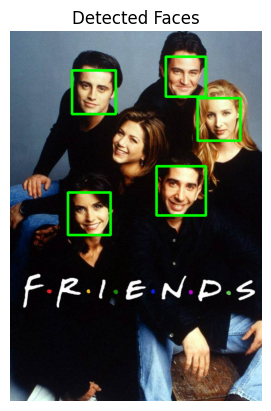

In [64]:
bounded_boxes_haar("friends")

**Why did it tell 5 faces?**

Faces found: 6


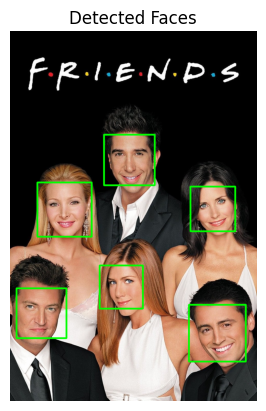

In [70]:
bounded_boxes_haar("friends_face")

---

### 🧠 **Introduction: Haar vs LBP Classifiers for Face Detection**

When it comes to classical face detection techniques in OpenCV, **Haar cascades** and **LBP (Local Binary Patterns)** cascades are two widely used methods. While both are based on machine learning classifiers trained with positive and negative images, they differ in how they extract features and perform detection.

---

### 🧬 **1. Haar Cascade Classifier:**
- **Inspired by:** Viola-Jones object detection framework.
- **Features:** Haar-like features capture **edge, line, and rectangle patterns** in an image.
- **Detection Speed:** Slower than LBP, but generally **more accurate** in detecting complex facial features.
- **Computational Cost:** Higher — uses floating point operations and integral images.
- **Use case:** Preferred when **precision matters more than speed**, like in high-quality static image analysis.

---

### ⚡ **2. LBP (Local Binary Pattern) Classifier:**
- **Inspired by:** Texture analysis based on pixel neighborhoods.
- **Features:** Encodes the texture of an image by comparing each pixel to its surrounding pixels.
- **Detection Speed:** Very **fast and lightweight**, ideal for real-time applications.
- **Computational Cost:** Lower — uses simple binary operations.
- **Use case:** Best suited for **real-time face detection** where speed is critical, even if it sacrifices some accuracy.

---

### 🆚 **Summary Table:**

| Feature              | Haar Cascade               | LBP Cascade                   |
|----------------------|----------------------------|-------------------------------|
| Feature Type         | Edge, Line, Rectangle      | Texture / Binary Pattern      |
| Accuracy             | Higher                     | Moderate                      |
| Speed                | Slower                     | Much Faster                   |
| Complexity           | Higher (floating point)    | Lower (binary operations)     |
| Ideal For            | Accuracy-focused detection | Real-time detection on low-power devices |

---

In [66]:
def bounded_boxes_lbp(name):
    # Load Haar cascade classifier
    haar_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

    # Load the image
    test1 = cv2.imread(f'{name}.jpg')

    if test1 is None:
        raise ValueError("Image not found or path is incorrect")

    # Convert to grayscale
    gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    # Print number of faces found
    print('Faces found:', len(faces))

    # Draw rectangles around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(test1, (x, y), (x + w, y + h), (0, 255, 0), 6)

    # Convert BGR image to RGB for display
    rgb_img = convertToRGB(test1)

    # Display the image with detected faces
    plt.imshow(rgb_img)
    plt.title('Detected Faces')
    plt.axis('off')
    plt.show()

Faces found: 2


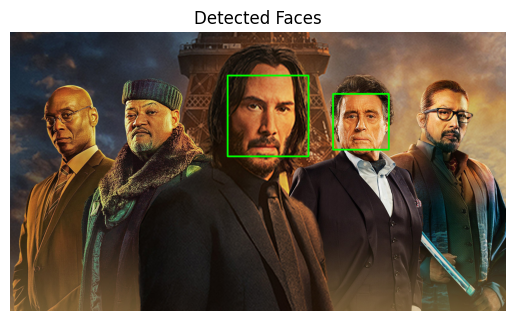

Faces found: 2


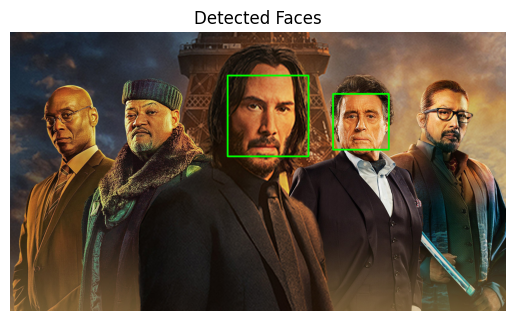

Haar Detection Time: 0.409 secs
Faces found: 2


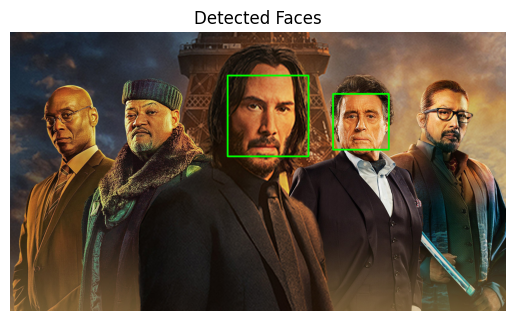

LBP Detection Time: 0.375 secs
Faces found: 2


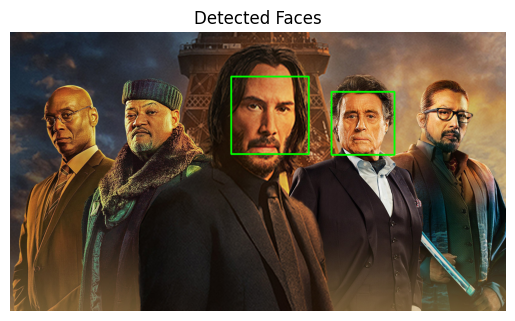

In [76]:
import cv2
import time
import matplotlib.pyplot as plt

# Assuming you have this function defined
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------- HAAR ----------
t1 = time.time()
bounded_boxes_haar("john_wick")
t2 = time.time()
dt1 = t2 - t1

# ---------- LBP ----------
t1 = time.time()
bounded_boxes_haar("john_wick")
t2 = time.time()
dt2 = t2 - t1

# Haar
print(f'Haar Detection Time: {round(dt1, 3)} secs')
bounded_boxes_haar("john_wick")

# LBP
print(f'LBP Detection Time: {round(dt2, 3)} secs')
bounded_boxes_lbp("john_wick")


## Lets try with our webcam

**Bounded box following our faces**

**Showing live face_count as well**

In [ ]:
import cv2
import time

# Load Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# Initialize webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Start timer
start_time = time.time()
duration = 30  # seconds

while True:
    # Check for timeout
    elapsed_time = time.time() - start_time
    if elapsed_time > duration:
        print("30 seconds over. Closing...")
        break

    # Read frame from webcam
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles and display face count
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show face count
    cv2.putText(frame, f"Faces: {len(faces)}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('Live Face Detection (30s Timer)', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Manually exited.")
        break

# Release everything
cap.release()
cv2.destroyAllWindows()


30 seconds over. Closing...


: 

## Final Showdown

**Object Detection through live web-cam**

---

## 🧠 How Face/Object Detection Works Using XML in OpenCV

### 🔍 1. **What is an XML file in this context?**

The `.xml` file in OpenCV is **not a random file**—it contains a **trained model** using a method called **Haar Cascades** (or LBP).  
It’s like a “recipe” or “cheat sheet” the computer uses to find objects (like faces, eyes, etc.) in images.

---

### 🏗️ 2. **How was the XML file created?**

This file was created using **machine learning** by training on **thousands of positive (face) and negative (non-face)** images.

Steps:
- Extract patterns from face images (like edges, lines, corners)
- Store them as features (using Haar-like features)
- Use an algorithm called **AdaBoost** to select the most useful ones
- Arrange them in a **cascade** (like a filter chain) that quickly eliminates non-face areas

The end result: an `.xml` file containing a **compact decision tree model**.

---

### ⚙️ 3. **How it works in detection:**

When you run this line in OpenCV:
```python
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
```

You're loading that trained model.

Then when you call:
```python
faces = face_cascade.detectMultiScale(gray_img)
```

This happens internally:
- The image is **converted to grayscale** (Haar needs single-channel images)
- The classifier **scans the image in small windows** (like a grid)
- At each window:
  - It checks if the patterns in that window **match the patterns** of a face (as learned in training)
- If a match is found, it **returns the coordinates (x, y, w, h)** of the face

---

### 📦 4. **What’s inside the XML file exactly?**

- Pretrained parameters like feature locations, thresholds, and weights
- The structure of the **cascade (classifier stages)**
- It’s basically serialized model data in XML format

---

### 📸 5. **Why use XML and not another format?**

- OpenCV supports it natively
- Easy to share
- Works across platforms
- Lightweight for runtime use

---

### 💡 Real World Example:

```python
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
img = cv2.imread('person.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
```

🔁 The `.xml` model scans your `gray` image to check for patterns that match a face, and gives you the coordinates where it found one.

---

In [3]:
!python object_test.py --prototxt MobileNetSSD_deploy.prototxt.txt --model MobileNetSSD_deploy.caffemodel

[INFO] loading model...
[INFO] starting video stream...
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 400, 3)
(225, 

---

### ✅ **Conclusion**

In this session, we explored the fundamentals of face detection using OpenCV and understood how Haar and LBP classifiers work with pre-trained XML files to detect facial features. We implemented practical Python programs to detect faces from both images and live video, added real-time face counting, bounding boxes, and even incorporated performance comparison between Haar and LBP models. Lastly, we broke down how these XML models function behind the scenes, bringing clarity to the mechanics of object detection.

Face detection is a foundational step in many computer vision applications, and mastering it gives you the confidence to dive deeper into more advanced topics like face recognition, tracking, and even anti-spoofing techniques. Keep experimenting—you're on a great path! 💻🧠📸

---